In [ ]:
import os
os.getcwd()

In [108]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
os.chdir('/gpfs/home/djs19ctu/ML_other')
os.getcwd()

In [110]:
contents = os.listdir(os.getcwd())

print("Contents of the current working directory:")
for item in contents:
    print(item)

Contents of the current working directory:
.ipynb_checkpoints
ML_other.ipynb
winequality-red.csv
.git


In [191]:
file_path = 'winequality-red.csv'
wine_data = pd.read_csv(file_path)
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Define qualities 1-5 as 'bad' and 6-10 as 'good'

In [192]:
quality2 = []
for i in wine_data['quality']:
    if i >= 1 and i <= 5:
        quality2.append(0)
    elif i >= 6 and i <= 10:
        quality2.append(1)
wine_data['quality_binary'] = quality2
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [185]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_binary        1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


# Correlation Matrix

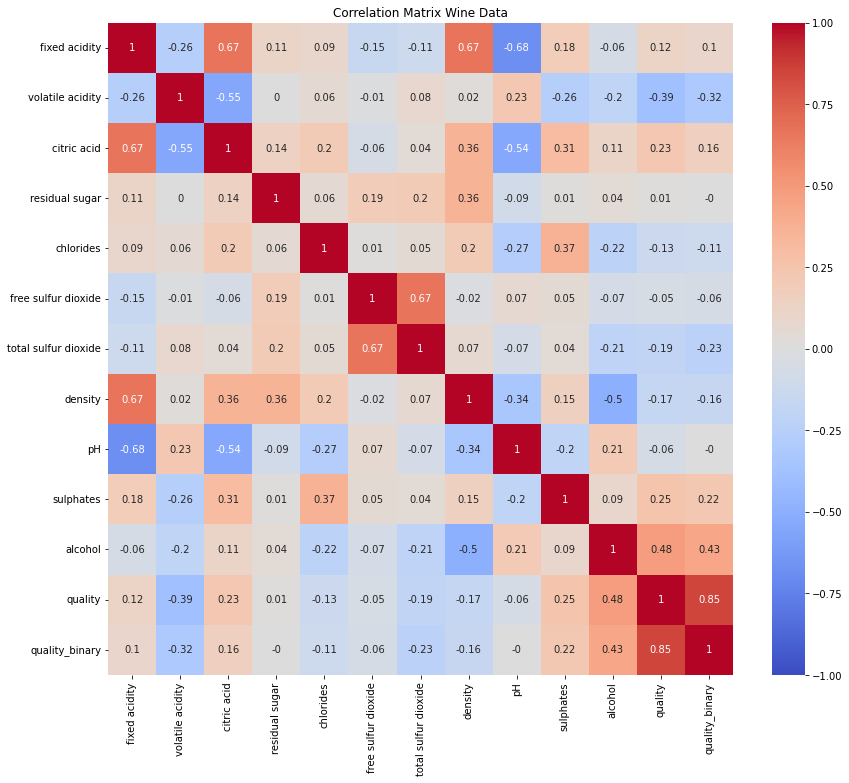

In [186]:

# Calculate the correlation matrix
corr_wine_data = round(wine_data.corr(), 2)

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_wine_data, vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Wine Data')
plt.show()

# Correlation with Quality

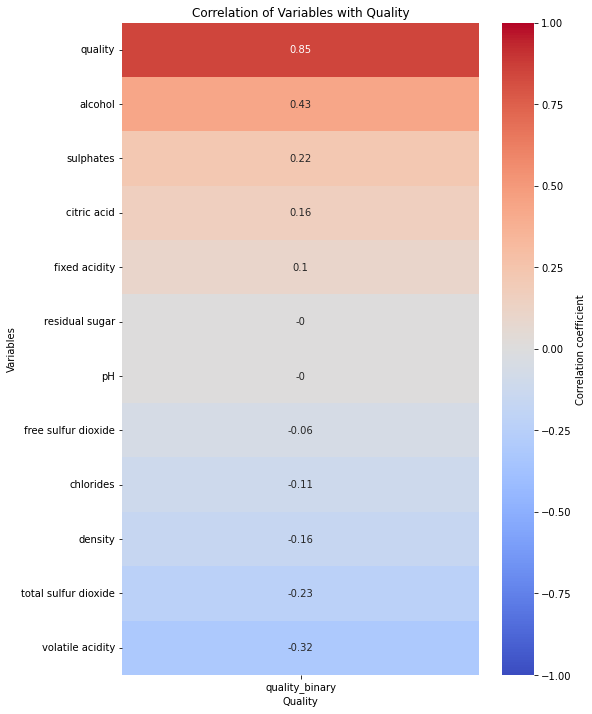

In [193]:
# Calculate the correlation matrix
corr_wine_data = round(wine_data.corr(), 2)

# Filter to only include correlations with 'max_longevity_d' and sort by correlation values
corr_quality = corr_wine_data[['quality_binary']].drop('quality_binary')
corr_quality_sorted = corr_quality.sort_values(by='quality_binary', ascending=False)

# Plot the heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(corr_quality_sorted, vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation of Variables with Quality')
plt.xlabel('Quality')
plt.ylabel('Variables')
plt.show()

# Histogram of the target

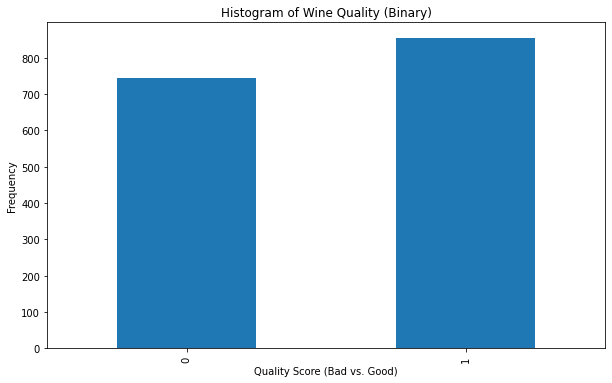

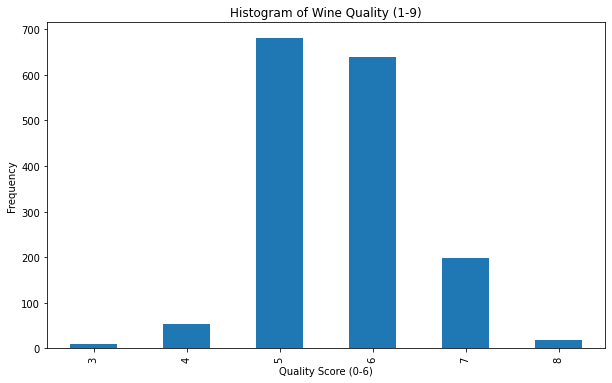

In [194]:

# Create a histogram for the 'quality_binary' data
plt.figure(figsize=(10, 6))

# Plot the histogram with sorted x-labels
wine_data['quality_binary'].value_counts().sort_index().plot(kind='bar', edgecolor='None')

# Add labels, title
plt.xlabel('Quality Score (Bad vs. Good)')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Quality (Binary)')

# Show the plot
plt.show()

# Create a histogram for the 'quality' data
plt.figure(figsize=(10, 6))

# Plot the histogram with sorted x-labels
wine_data['quality'].value_counts().sort_index().plot(kind='bar', edgecolor='None')

# Add labels, title
plt.xlabel('Quality Score (0-6)')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Quality (1-9)')

# Show the plot
plt.show()

# Train Test Split

In [195]:
from sklearn.model_selection import train_test_split, cross_val_score

train_df, test_df = train_test_split(wine_data, test_size=0.2, random_state=42)

print(f"Training data shape: {train_df.shape}")
print(f"Training data shape: {test_df.shape}")

Training data shape: (1279, 13)
Training data shape: (320, 13)


In [196]:
from sklearn.preprocessing import MinMaxScaler

X_train = train_df.drop(columns=['quality', 'quality_binary'])
y_train = train_df['quality_binary']

X_test = test_df.drop(columns=['quality', 'quality_binary'])
y_test = test_df['quality_binary']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Convert the scaled training data back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Add the target variable back to the scaled training DataFrame
train_df_scaled = X_train_scaled_df.copy()
train_df_scaled['quality_binary'] = y_train.values

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled test data back to a DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Add the target variable back to the scaled test DataFrame
test_df_scaled = X_test_scaled_df.copy()
test_df_scaled['quality_binary'] = y_test.values


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
0,0.274336,0.301370,0.08,0.109589,0.170284,0.194030,0.141343,0.516153,0.393701,0.177914,0.184615,1
1,0.283186,0.260274,0.17,0.047945,0.116861,0.298507,0.339223,0.435389,0.511811,0.067485,0.169231,0
2,0.539823,0.376712,0.22,0.123288,0.158598,0.238806,0.098940,0.758443,0.425197,0.374233,0.230769,1
3,0.345133,0.232877,0.31,0.092466,0.110184,0.462687,0.183746,0.582232,0.464567,0.104294,0.215385,0
4,0.185841,0.232877,0.24,0.054795,0.108514,0.253731,0.098940,0.347283,0.511811,0.141104,0.338462,1
...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.194690,0.356164,0.00,0.123288,0.185309,0.208955,0.095406,0.389868,0.551181,0.159509,0.446154,1
316,0.176991,0.349315,0.00,0.232877,0.135225,0.746269,0.252650,0.404552,0.362205,0.049080,0.169231,0
317,0.327434,0.328767,0.25,0.089041,0.176962,0.119403,0.113074,0.447137,0.322835,0.098160,0.215385,0
318,0.371681,0.102740,0.39,0.075342,0.146912,0.283582,0.074205,0.395742,0.322835,0.196319,0.430769,1


In [204]:
train_df_scaled.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
0,0.362832,0.390411,0.31,0.143836,0.123539,0.328358,0.265018,0.743759,0.582677,0.226994,0.492308,1
1,0.132743,0.061644,0.40,0.034247,0.090150,0.589552,0.561837,0.082966,0.401575,0.134969,0.538462,1
2,0.557522,0.184932,0.47,0.061644,0.176962,0.074627,0.028269,0.596916,0.440945,0.233129,0.215385,1
3,0.371681,0.386986,0.26,0.047945,0.126878,0.223881,0.060071,0.504405,0.456693,0.061350,0.153846,0
4,0.336283,0.626712,0.15,0.349315,0.101836,0.149254,0.169611,0.655653,0.496063,0.073620,0.230769,0


In [205]:
test_df_scaled.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
0,0.274336,0.301370,0.08,0.109589,0.170284,0.194030,0.141343,0.516153,0.393701,0.177914,0.184615,1
1,0.283186,0.260274,0.17,0.047945,0.116861,0.298507,0.339223,0.435389,0.511811,0.067485,0.169231,0
2,0.539823,0.376712,0.22,0.123288,0.158598,0.238806,0.098940,0.758443,0.425197,0.374233,0.230769,1
3,0.345133,0.232877,0.31,0.092466,0.110184,0.462687,0.183746,0.582232,0.464567,0.104294,0.215385,0
4,0.185841,0.232877,0.24,0.054795,0.108514,0.253731,0.098940,0.347283,0.511811,0.141104,0.338462,1


In [197]:
train_df = train_df_scaled
test_df = test_df_scaled


# DECISION TREE PARAMETER SEARCH

In [206]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Ensure train_df and test_df are copied to avoid modifying the original data
train_df = train_df.copy()
test_df = test_df.copy()

# Define X and y
X_train = train_df.drop(columns=['quality_binary'])
y_train = train_df['quality_binary']

# Define the parameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'splitter': ['best', 'random']
}

# Initialize the model
model_DT = DecisionTreeClassifier(random_state=42)

# Define the repeated k-fold cross-validator
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_DT,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=rkf,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")


Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Best Parameters: {'splitter': 'random', 'min_samples_split': 7, 'min_samples_leaf': 11, 'max_depth': 13, 'criterion': 'entropy'}
Best Cross-Validation Score: 0.7237


# DECISION TREE with Cross Validation

In [243]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Ensure train_df and test_df are copied to avoid modifying the original data
train_df = train_df.copy()
test_df = test_df.copy()

# Define X and y
X_train = train_df.drop(columns=['quality_binary'])
y_train = train_df['quality_binary']


# Best Parameters: {'splitter': 'random', 'min_samples_split': 7, 'min_samples_leaf': 11, 
# 'max_depth': 13, 'criterion': 'entropy'}
    
### Repeated Cross-Validation ###
model_DT = DecisionTreeClassifier(splitter= 'random', criterion='entropy', max_depth=13, min_samples_leaf=11,
                      min_samples_split=7, random_state=42)

# Define the repeated k-fold cross-validator
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Perform cross-validation and get the Accuracy, Precision, Recall, and F1 scores
cv_accuracy_scores_dt = cross_val_score(model_DT, X_train, y_train, cv=rkf, scoring='accuracy', n_jobs=-1)
cv_precision_scores_dt = cross_val_score(model_DT, X_train, y_train, cv=rkf, scoring='precision', n_jobs=-1)
cv_recall_scores_dt = cross_val_score(model_DT, X_train, y_train, cv=rkf, scoring='recall', n_jobs=-1)
cv_f1_scores_dt = cross_val_score(model_DT, X_train, y_train, cv=rkf, scoring='f1', n_jobs=-1)

# Calculate the mean and standard deviation of the scores
mean_cv_accuracy_dt = np.mean(cv_accuracy_scores_dt)
std_cv_accuracy_dt = np.std(cv_accuracy_scores_dt)
mean_cv_precision_dt = np.mean(cv_precision_scores_dt)
std_cv_precision_dt = np.std(cv_precision_scores_dt)
mean_cv_recall_dt = np.mean(cv_recall_scores_dt)
std_cv_recall_dt = np.std(cv_recall_scores_dt)
mean_cv_f1_dt = np.mean(cv_f1_scores_dt)
std_cv_f1_dt = np.std(cv_f1_scores_dt)

print(f"Mean Cross-Validation Accuracy DT: {mean_cv_accuracy_dt:.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy DT: {std_cv_accuracy_dt:.4f}")
print(f"Mean Cross-Validation Precision DT: {mean_cv_precision_dt:.4f}")
print(f"Standard Deviation of Cross-Validation Precision DT: {std_cv_precision_dt:.4f}")
print(f"Mean Cross-Validation Recall DT: {mean_cv_recall_dt:.4f}")
print(f"Standard Deviation of Cross-Validation Recall DT: {std_cv_recall_dt:.4f}")
print(f"Mean Cross-Validation F1 score DT: {mean_cv_f1_dt:.4f}")
print(f"Standard Deviation of Cross-Validation F1 score DT: {std_cv_f1_dt:.4f}")

# Fit the model to get feature importances
model_DT.fit(X_train, y_train)
feature_importances_dt = model_DT.feature_importances_
sorted_idx = feature_importances_dt.argsort()

predictions_train_dt = model_DT.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, predictions_train_dt)
train_precision_dt = precision_score(y_train, predictions_train_dt)
train_recall_dt = recall_score(y_train, predictions_train_dt)
train_f1_dt = f1_score(y_train, predictions_train_dt)
print(f"Training Accuracy DT: {train_accuracy_dt}")
print(f"Training Precision DT: {train_precision_dt}")
print(f"Training Recall DT: {train_recall_dt}")
print(f"Training F1 score DT: {train_f1_dt}")


# Evaluate the model on the test data
X_test = test_df.drop(columns=['quality_binary'])
y_test = test_df['quality_binary']

predictions_test_dt = model_DT.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, predictions_test_dt)
test_precision_dt = precision_score(y_test, predictions_test_dt)
test_recall_dt = recall_score(y_test, predictions_test_dt)
test_f1_dt = f1_score(y_test, predictions_test_dt)

print(f"Testing Accuracy DT: {test_accuracy_dt}")
print(f"Testing Precision DT: {test_precision_dt}")
print(f"Testing Recall DT: {test_recall_dt}")
print(f"Testing F1 score DT: {test_f1_dt}")

# Generate and print the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, predictions_test_dt)
print("Confusion matrix:\n", conf_matrix_dt)


Mean Cross-Validation Accuracy DT: 0.7237
Standard Deviation of Cross-Validation Accuracy DT: 0.0192
Mean Cross-Validation Precision DT: 0.7488
Standard Deviation of Cross-Validation Precision DT: 0.0460
Mean Cross-Validation Recall DT: 0.7253
Standard Deviation of Cross-Validation Recall DT: 0.0491
Mean Cross-Validation F1 score DT: 0.7344
Standard Deviation of Cross-Validation F1 score DT: 0.0203
Training Accuracy DT: 0.7740422204847537
Training Precision DT: 0.8076311605723371
Training Recall DT: 0.7514792899408284
Training F1 score DT: 0.7785440613026821
Testing Accuracy DT: 0.68125
Testing Precision DT: 0.72
Testing Recall DT: 0.7039106145251397
Testing F1 score DT: 0.7118644067796609
Confusion matrix:
 [[ 92  49]
 [ 53 126]]


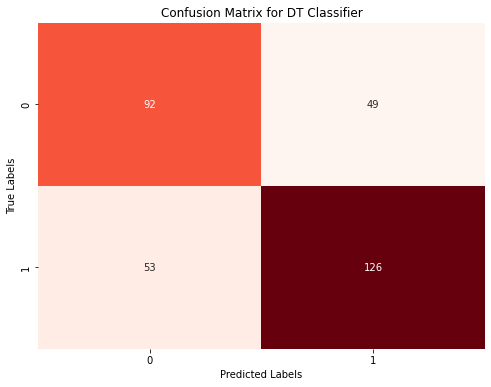

In [244]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for DT Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# RANDOM FOREST PARAMETER SEARCH

In [135]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Ensure train_df and test_df are copied to avoid modifying the original data
train_df = train_df.copy()
test_df = test_df.copy()

# Define X and y
X_train = train_df.drop(columns=['quality_binary'])
y_train = train_df['quality_binary']

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': np.arange(5, 30, 5),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Initialize the model
model_RF = RandomForestClassifier(random_state=42)

# Define the repeated k-fold cross-validator
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_RF,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=rkf,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
448 fits failed with the following error:
Traceback (most recent call last):
  File "/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini', 'bootstrap': True}
Best Cross-Validation Score: 0.8142


# RANDOM FOREST with Cross Validation

In [241]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Ensure train_df and test_df are copied to avoid modifying the original data
train_df = train_df.copy()
test_df = test_df.copy()

# Define X and y
X_train = train_df.drop(columns=['quality_binary'])
y_train = train_df['quality_binary']

#Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1,
# 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini', 'bootstrap': True}
### Repeated Cross-Validation ###
model_RF = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=15, min_samples_leaf=1,
                      min_samples_split=2, max_features= 'sqrt', bootstrap= True, random_state=42)

# Define the repeated k-fold cross-validator
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Perform cross-validation and get the Accuracy, Precision, Recall, and F1 scores
cv_accuracy_scores_rf = cross_val_score(model_RF, X_train, y_train, cv=rkf, scoring='accuracy', n_jobs=-1)
cv_precision_scores_rf = cross_val_score(model_RF, X_train, y_train, cv=rkf, scoring='precision', n_jobs=-1)
cv_recall_scores_rf = cross_val_score(model_RF, X_train, y_train, cv=rkf, scoring='recall', n_jobs=-1)
cv_f1_scores_rf = cross_val_score(model_RF, X_train, y_train, cv=rkf, scoring='f1', n_jobs=-1)

# Calculate the mean and standard deviation of the scores
mean_cv_accuracy_rf = np.mean(cv_accuracy_scores_rf)
std_cv_accuracy_rf = np.std(cv_accuracy_scores_rf)
mean_cv_precision_rf = np.mean(cv_precision_scores_rf)
std_cv_precision_rf = np.std(cv_precision_scores_rf)
mean_cv_recall_rf = np.mean(cv_recall_scores_rf)
std_cv_recall_rf = np.std(cv_recall_scores_rf)
mean_cv_f1_rf = np.mean(cv_f1_scores_rf)
std_cv_f1_rf = np.std(cv_f1_scores_rf)

print(f"Mean Cross-Validation Accuracy RF: {mean_cv_accuracy_rf:.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy RF: {std_cv_accuracy_rf:.4f}")
print(f"Mean Cross-Validation Precision RF: {mean_cv_precision_rf:.4f}")
print(f"Standard Deviation of Cross-Validation Precision RF: {std_cv_precision_rf:.4f}")
print(f"Mean Cross-Validation Recall RF: {mean_cv_recall_rf:.4f}")
print(f"Standard Deviation of Cross-Validation Recall RF: {std_cv_recall_rf:.4f}")
print(f"Mean Cross-Validation F1 score RF: {mean_cv_f1_rf:.4f}")
print(f"Standard Deviation of Cross-Validation F1 score RF: {std_cv_f1_rf:.4f}")

# Fit the model to get feature importances
model_RF.fit(X_train, y_train)
feature_importances_rf = model_RF.feature_importances_
sorted_idx = feature_importances_rf.argsort()

predictions_train_rf = model_RF.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, predictions_train_rf)
train_precision_rf = precision_score(y_train, predictions_train_rf)
train_recall_rf = recall_score(y_train, predictions_train_rf)
train_f1_rf = f1_score(y_train, predictions_train_rf)
print(f"Training Accuracy RF: {train_accuracy_rf}")
print(f"Training Precision RF: {train_precision_rf}")
print(f"Training Recall RF: {train_recall_rf}")
print(f"Training F1 score RF: {train_f1_rf}")

# Evaluate the model on the test data
X_test = test_df.drop(columns=['quality_binary'])
y_test = test_df['quality_binary']

predictions_test_rf = model_RF.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, predictions_test_rf)
test_precision_rf = precision_score(y_test, predictions_test_rf)
test_recall_rf = recall_score(y_test, predictions_test_rf)
test_f1_rf = f1_score(y_test, predictions_test_rf)

print(f"Testing Accuracy RF: {test_accuracy_rf}")
print(f"Testing Precision RF: {test_precision_rf}")
print(f"Testing Recall RF: {test_recall_rf}")
print(f"Testing F1 score RF: {test_f1_rf}")

# Predict the target values for the test set

# Generate and print the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, predictions_test_rf)
print("Confusion matrix:\n", conf_matrix_rf)

# Plot feature importances
#plt.figure(figsize=(10, 8))
#plt.barh(np.array(X.columns)[sorted_idx], feature_importances_rf[sorted_idx], color='lightcoral')
#plt.xlabel('Feature Importance RF')
#plt.title('Feature Importances from Random Forest Classifier')
#plt.show()

Mean Cross-Validation Accuracy RF: 0.8113
Standard Deviation of Cross-Validation Accuracy RF: 0.0192
Mean Cross-Validation Precision RF: 0.8291
Standard Deviation of Cross-Validation Precision RF: 0.0264
Mean Cross-Validation Recall RF: 0.8107
Standard Deviation of Cross-Validation Recall RF: 0.0243
Mean Cross-Validation F1 score RF: 0.8194
Standard Deviation of Cross-Validation F1 score RF: 0.0173
Training Accuracy RF: 1.0
Training Precision RF: 1.0
Training Recall RF: 1.0
Training F1 score RF: 1.0
Testing Accuracy RF: 0.79375
Testing Precision RF: 0.8087431693989071
Testing Recall RF: 0.8268156424581006
Testing F1 score RF: 0.8176795580110497
Confusion matrix:
 [[106  35]
 [ 31 148]]


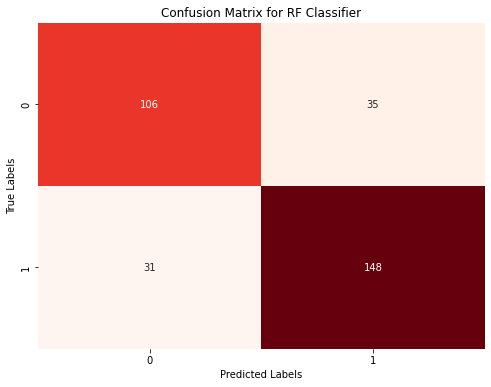

In [242]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for RF Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# XGBOOST PARAMETER SEARCH

In [201]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from xgboost import XGBClassifier

# Ensure train_df and test_df are copied to avoid modifying the original data
train_df = train_df.copy()
test_df = test_df.copy()

# Define X and y
X_train = train_df.drop(columns=['quality_binary'])
y_train = train_df['quality_binary']

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 6, 9, 12, 15],
    'min_child_weight': [1, 3, 5, 7, 10, 12],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
}

# Initialize the model
model_XGB = XGBClassifier(random_state=42, eval_metric='logloss')

# Define the repeated k-fold cross-validator
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_XGB,
    param_distributions=param_grid,
    n_iter=100,
    scoring='accuracy',
    cv=rkf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")


Fitting 15 folds for each of 100 candidates, totalling 1500 fits
[CV] END colsample_bytree=0.6, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=10, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=400, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=

# XGBOOST PARAMETER with Cross Validation

In [248]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ensure train_df and test_df are copied to avoid modifying the original data
train_df = train_df.copy()
test_df = test_df.copy()

# Define X and y
X_train = train_df.drop(columns=['quality_binary'])
y_train = train_df['quality_binary']

#Best Parameters: {'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 12,
#                  'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.9}

### Repeated Cross-Validation ###
model_XGB = XGBClassifier(subsample= 1.0, n_estimators= 400, min_child_weight= 1, max_depth= 12,
               learning_rate= 0.01, gamma= 0, colsample_bytree= 0.9, random_state=42, eval_metric='logloss')

# Define the repeated k-fold cross-validator
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Perform cross-validation and get the Accuracy, Precision, Recall, and F1 scores
cv_accuracy_scores_xgb = cross_val_score(model_XGB, X_train, y_train, cv=rkf, scoring='accuracy', n_jobs=-1)
cv_precision_scores_xgb = cross_val_score(model_XGB, X_train, y_train, cv=rkf, scoring='precision', n_jobs=-1)
cv_recall_scores_xgb = cross_val_score(model_XGB, X_train, y_train, cv=rkf, scoring='recall', n_jobs=-1)
cv_f1_scores_xgb = cross_val_score(model_XGB, X_train, y_train, cv=rkf, scoring='f1', n_jobs=-1)

# Calculate the mean and standard deviation of the scores
mean_cv_accuracy_xgb = np.mean(cv_accuracy_scores_xgb)
std_cv_accuracy_xgb = np.std(cv_accuracy_scores_xgb)
mean_cv_precision_xgb = np.mean(cv_precision_scores_xgb)
std_cv_precision_xgb = np.std(cv_precision_scores_xgb)
mean_cv_recall_xgb = np.mean(cv_recall_scores_xgb)
std_cv_recall_xgb = np.std(cv_recall_scores_xgb)
mean_cv_f1_xgb = np.mean(cv_f1_scores_xgb)
std_cv_f1_xgb = np.std(cv_f1_scores_xgb)

print(f"Mean Cross-Validation Accuracy XGB: {mean_cv_accuracy_xgb:.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy XGB: {std_cv_accuracy_xgb:.4f}")
print(f"Mean Cross-Validation Precision XGB: {mean_cv_precision_xgb:.4f}")
print(f"Standard Deviation of Cross-Validation Precision XGB: {std_cv_precision_xgb:.4f}")
print(f"Mean Cross-Validation Recall XGB: {mean_cv_recall_xgb:.4f}")
print(f"Standard Deviation of Cross-Validation Recall XGB: {std_cv_recall_xgb:.4f}")
print(f"Mean Cross-Validation F1 score XGB: {mean_cv_f1_xgb:.4f}")
print(f"Standard Deviation of Cross-Validation F1 score XGB: {std_cv_f1_xgb:.4f}")

# Fit the model to get feature importances
model_XGB.fit(X_train, y_train)
feature_importances_xgb = model_XGB.feature_importances_
sorted_idx = feature_importances_xgb.argsort()

predictions_train_xgb = model_XGB.predict(X_train)
train_accuracy_xgb = accuracy_score(y_train, predictions_train_xgb)
train_precision_xgb = precision_score(y_train, predictions_train_xgb)
train_recall_xgb = recall_score(y_train, predictions_train_xgb)
train_f1_xgb = f1_score(y_train, predictions_train_xgb)
print(f"Training Accuracy XGB: {train_accuracy_xgb}")
print(f"Training Precision XGB: {train_precision_xgb}")
print(f"Training Recall XGB: {train_recall_xgb}")
print(f"Training F1 score XGB: {train_f1_xgb}")

# Evaluate the model on the test data
X_test = test_df.drop(columns=['quality_binary'])
y_test = test_df['quality_binary']

predictions_test_xgb = model_XGB.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, predictions_test_xgb)
test_precision_xgb = precision_score(y_test, predictions_test_xgb)
test_recall_xgb = recall_score(y_test, predictions_test_xgb)
test_f1_xgb = f1_score(y_test, predictions_test_xgb)

print(f"Testing Accuracy XGB: {test_accuracy_xgb}")
print(f"Testing Precision XGB: {test_precision_xgb}")
print(f"Testing Recall XGB: {test_recall_xgb}")
print(f"Testing F1 score XGB: {test_f1_xgb}")

# Predict the target values for the test set

# Generate and print the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, predictions_test_xgb)
print("Confusion matrix:\n", conf_matrix_xgb)

# Plot feature importances
#plt.figure(figsize=(10, 8))
#plt.barh(np.array(X.columns)[sorted_idx], feature_importances_xgb[sorted_idx], color='lightcoral')
#plt.xlabel('Feature Importance XGB')
#plt.title('Feature Importances from XGBoost Classifier')
#plt.show()


Mean Cross-Validation Accuracy XGB: 0.8024
Standard Deviation of Cross-Validation Accuracy XGB: 0.0175
Mean Cross-Validation Precision XGB: 0.8155
Standard Deviation of Cross-Validation Precision XGB: 0.0217
Mean Cross-Validation Recall XGB: 0.8096
Standard Deviation of Cross-Validation Recall XGB: 0.0256
Mean Cross-Validation F1 score XGB: 0.8122
Standard Deviation of Cross-Validation F1 score XGB: 0.0164
Training Accuracy XGB: 0.9992181391712275
Training Precision XGB: 0.9985228951255539
Training Recall XGB: 1.0
Training F1 score XGB: 0.999260901699926
Testing Accuracy XGB: 0.7875
Testing Precision XGB: 0.8066298342541437
Testing Recall XGB: 0.8156424581005587
Testing F1 score XGB: 0.8111111111111111
Confusion matrix:
 [[106  35]
 [ 33 146]]


/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/gpfs/home/djs19ctu/.loc

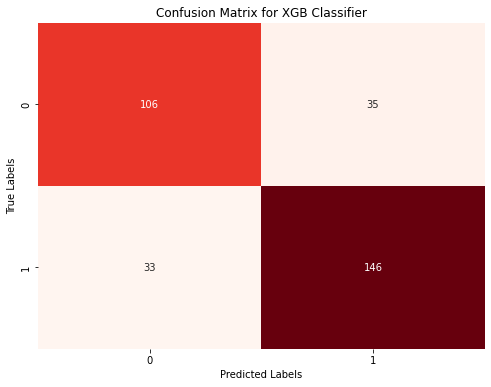

In [240]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for XGB Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# GRADIENT BOOSTING PARAMETER SEARCH

In [77]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import GradientBoostingClassifier

# Ensure train_df and test_df are copied to avoid modifying the original data
train_df = train_df.copy()
test_df = test_df.copy()

# Define X and y
X_train = train_df.drop(columns=['quality_binary'])
y_train = train_df['quality_binary']

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 6, 9, 12, 15],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]
}

# Initialize the model
model_GB = GradientBoostingClassifier(random_state=42)

# Define the repeated k-fold cross-validator
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_GB,
    param_distributions=param_grid,
    n_iter=100,
    scoring='accuracy',
    cv=rkf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")


Fitting 15 folds for each of 100 candidates, totalling 1500 fits

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=12, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=6, min_child_weight=12, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning

# GRADIENT BOOSTING with Cross Validation

Mean Cross-Validation Accuracy GB: 0.8058
Standard Deviation of Cross-Validation Accuracy GB: 0.0183
Mean Cross-Validation Precision GB: 0.8232
Standard Deviation of Cross-Validation Precision GB: 0.0229
Mean Cross-Validation Recall GB: 0.8061
Standard Deviation of Cross-Validation Recall GB: 0.0255
Mean Cross-Validation F1 score GB: 0.8142
Standard Deviation of Cross-Validation F1 score GB: 0.0168
Training Accuracy GB: 1.0
Training Precision GB: 1.0
Training Recall GB: 1.0
Training F1 score GB: 1.0
Testing Accuracy GB: 0.8125
Testing Precision GB: 0.8361581920903954
Testing Recall GB: 0.8268156424581006
Testing F1 score GB: 0.8314606741573033
Confusion matrix gbc:
 [[112  29]
 [ 31 148]]


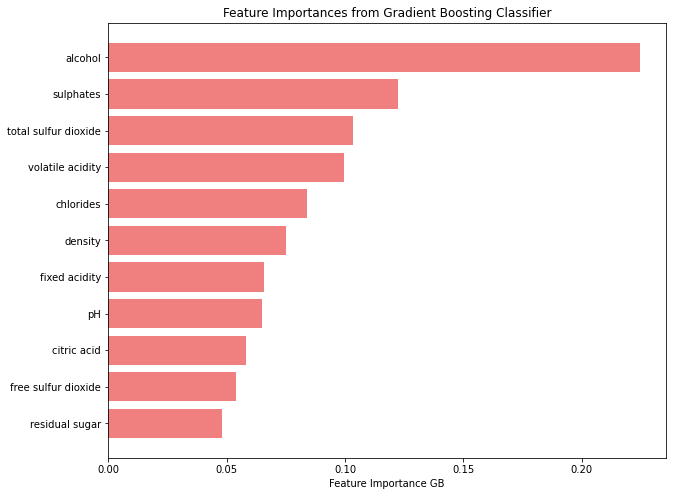

In [227]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ensure train_df and test_df are copied to avoid modifying the original data
train_df = train_df.copy()
test_df = test_df.copy()

# Define X and y
X_train = train_df.drop(columns=['quality_binary'])
y_train = train_df['quality_binary']


#Best Parameters: {'subsample': 0.6, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 6, 
#                 'max_depth': 15, 'learning_rate': 0.01}
    
### Repeated Cross-Validation ###
model_GB = GradientBoostingClassifier(subsample= 0.6, 
                                      n_estimators= 400, 
                                      min_samples_split= 2,
                                      min_samples_leaf= 6,
                                      max_depth= 15,
                                      learning_rate= 0.01, 
                                      random_state=42)

# Define the repeated k-fold cross-validator
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Perform cross-validation and get the Accuracy, Precision, Recall, and F1 scores
cv_accuracy_scores_gb = cross_val_score(model_GB, X_train, y_train, cv=rkf, scoring='accuracy', n_jobs=-1)
cv_precision_scores_gb = cross_val_score(model_GB, X_train, y_train, cv=rkf, scoring='precision', n_jobs=-1)
cv_recall_scores_gb = cross_val_score(model_GB, X_train, y_train, cv=rkf, scoring='recall', n_jobs=-1)
cv_f1_scores_gb = cross_val_score(model_GB, X_train, y_train, cv=rkf, scoring='f1', n_jobs=-1)

# Calculate the mean and standard deviation of the scores
mean_cv_accuracy_gb = np.mean(cv_accuracy_scores_gb)
std_cv_accuracy_gb = np.std(cv_accuracy_scores_gb)
mean_cv_precision_gb = np.mean(cv_precision_scores_gb)
std_cv_precision_gb = np.std(cv_precision_scores_gb)
mean_cv_recall_gb = np.mean(cv_recall_scores_gb)
std_cv_recall_gb = np.std(cv_recall_scores_gb)
mean_cv_f1_gb = np.mean(cv_f1_scores_gb)
std_cv_f1_gb = np.std(cv_f1_scores_gb)

print(f"Mean Cross-Validation Accuracy GB: {mean_cv_accuracy_gb:.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy GB: {std_cv_accuracy_gb:.4f}")
print(f"Mean Cross-Validation Precision GB: {mean_cv_precision_gb:.4f}")
print(f"Standard Deviation of Cross-Validation Precision GB: {std_cv_precision_gb:.4f}")
print(f"Mean Cross-Validation Recall GB: {mean_cv_recall_gb:.4f}")
print(f"Standard Deviation of Cross-Validation Recall GB: {std_cv_recall_gb:.4f}")
print(f"Mean Cross-Validation F1 score GB: {mean_cv_f1_gb:.4f}")
print(f"Standard Deviation of Cross-Validation F1 score GB: {std_cv_f1_gb:.4f}")

# Fit the model to get feature importances
model_GB.fit(X_train, y_train)
feature_importances_gb = model_GB.feature_importances_
sorted_idx = feature_importances_gb.argsort()

predictions_train_gb = model_GB.predict(X_train)
train_accuracy_gb = accuracy_score(y_train, predictions_train_gb)
train_precision_gb = precision_score(y_train, predictions_train_gb)
train_recall_gb = recall_score(y_train, predictions_train_gb)
train_f1_gb = f1_score(y_train, predictions_train_gb)
print(f"Training Accuracy GB: {train_accuracy_gb}")
print(f"Training Precision GB: {train_precision_gb}")
print(f"Training Recall GB: {train_recall_gb}")
print(f"Training F1 score GB: {train_f1_gb}")

# Evaluate the model on the test data
X_test = test_df.drop(columns=['quality_binary'])
y_test = test_df['quality_binary']

predictions_test_gb = model_GB.predict(X_test)
test_accuracy_gb = accuracy_score(y_test, predictions_test_gb)
test_precision_gb = precision_score(y_test, predictions_test_gb)
test_recall_gb = recall_score(y_test, predictions_test_gb)
test_f1_gb = f1_score(y_test, predictions_test_gb)

print(f"Testing Accuracy GB: {test_accuracy_gb}")
print(f"Testing Precision GB: {test_precision_gb}")
print(f"Testing Recall GB: {test_recall_gb}")
print(f"Testing F1 score GB: {test_f1_gb}")

# Predict the target values for the test set

# Generate and print the confusion matrix
conf_matrix_gbc = confusion_matrix(y_test, predictions_test_gb)
print("Confusion matrix gbc:\n", conf_matrix)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(np.array(X.columns)[sorted_idx], feature_importances_gb[sorted_idx], color='lightcoral')
plt.xlabel('Feature Importance GB')
plt.title('Feature Importances from Gradient Boosting Classifier')
plt.show()


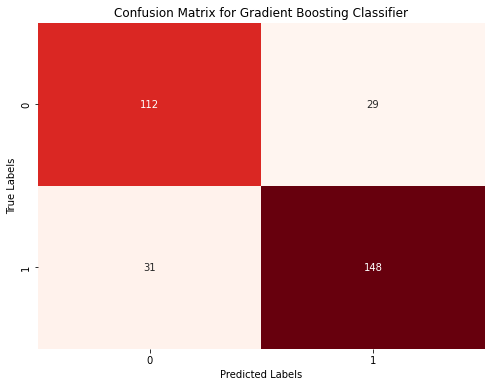

In [228]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [238]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100), (200, 200)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']}

# Initialize the MLPClassifier
model_MLP = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_MLP, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters: ", best_params)

# Initialize the MLPClassifier with the best parameters
model_MLP = MLPClassifier(**best_params, random_state=42)


Best Parameters:  {'alpha': 0.0001, 'hidden_layer_sizes': (200, 200), 'learning_rate': 'constant'}


/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [236]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ensure train_df and test_df are copied to avoid modifying the original data
train_df = train_df.copy()
test_df = test_df.copy()

# Define X and y for the training data
X_train = train_df.drop(columns=['quality_binary'])
y_train = train_df['quality_binary']


#Best Parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200), 
#                  'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
    
# Define the MLP model with some example parameters
model_MLP = MLPClassifier(activation= 'relu', 
                          alpha= 0.0001, 
                          hidden_layer_sizes= (200, 200), 
                          learning_rate= 'constant', 
                          max_iter= 200, 
                          solver= 'adam',
                          random_state=42)

# Fit the model to get feature importances
model_MLP.fit(X_train, y_train)

# Evaluate the model on the training data
predictions_train_mlp = model_MLP.predict(X_train)
train_accuracy_mlp = accuracy_score(y_train, predictions_train_mlp)
train_precision_mlp = precision_score(y_train, predictions_train_mlp)
train_recall_mlp = recall_score(y_train, predictions_train_mlp)
train_f1_mlp = f1_score(y_train, predictions_train_mlp)
print(f"Training Accuracy MLP: {train_accuracy_mlp}")
print(f"Training Precision MLP: {train_precision_mlp}")
print(f"Training Recall MLP: {train_recall_mlp}")
print(f"Training F1 score MLP: {train_f1_mlp}")

# Evaluate the model on the test data
X_test = test_df.drop(columns=['quality_binary'])
y_test = test_df['quality_binary']

predictions_test_mlp = model_MLP.predict(X_test)
test_accuracy_mlp = accuracy_score(y_test, predictions_test_mlp)
test_precision_mlp = precision_score(y_test, predictions_test_mlp)
test_recall_mlp = recall_score(y_test, predictions_test_mlp)
test_f1_mlp = f1_score(y_test, predictions_test_mlp)

print(f"Testing Accuracy MLP: {test_accuracy_mlp}")
print(f"Testing Precision MLP: {test_precision_mlp}")
print(f"Testing Recall MLP: {test_recall_mlp}")
print(f"Testing F1 score MLP: {test_f1_mlp}")

# Generate and print the confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, predictions_test_mlp)
print("Confusion matrix MLP:\n", conf_matrix_mlp)


Training Accuracy MLP: 0.8295543393275997
Training Precision MLP: 0.8544891640866873
Training Recall MLP: 0.8165680473372781
Training F1 score MLP: 0.8350983358547656
Testing Accuracy MLP: 0.75625
Testing Precision MLP: 0.8023952095808383
Testing Recall MLP: 0.7486033519553073
Testing F1 score MLP: 0.7745664739884393
Confusion matrix MLP:
 [[108  33]
 [ 45 134]]


/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/gpfs/home/djs19ctu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/gpfs/home/djs19ctu/.loc

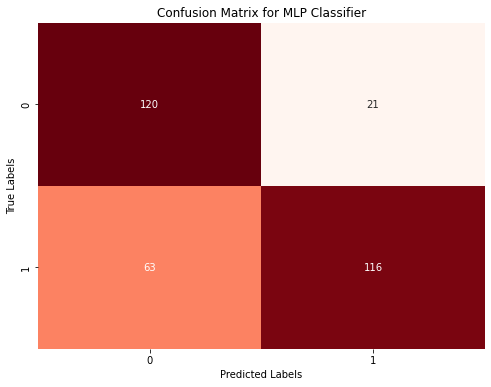

In [234]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix for MLP Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

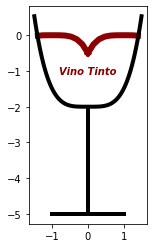

In [19]:
### Draw a wine glass ###

# Function to draw a wine glass
def draw_wine_glass():
    fig, ax = plt.subplots()

    # Define the coordinates for the base, stem, and bowl
    base_x = np.array([-1, 1])
    base_y = np.array([-5, -5])

    stem_x = np.array([0, 0])
    stem_y = np.array([-5, -2])

    bowl_side_left_x = np.linspace(-1.4, 0, 10)
    bowl_side_left_y = -0.5 * (bowl_side_left_x + 1)**4 + 1

    bowl_side_right_x = np.linspace(0, 1.4, 10)
    bowl_side_right_y = -0.5 * (bowl_side_right_x - 1)**4 + 1

    bowl_top_x = np.linspace(-1.5, 1.5, 100)
    bowl_top_y = -1 + 0.5 * bowl_top_x**4

    # Plot the base
    ax.plot(base_x, base_y, color='black', linewidth=4)

    # Plot the stem
    ax.plot(stem_x, stem_y, color='black', linewidth=4)

    # Plot the bowl
    ax.plot(bowl_side_left_x, bowl_side_left_y - 1, color='darkred', linewidth=6)
    ax.plot(bowl_side_right_x, bowl_side_right_y - 1, color='darkred', linewidth=6)
    ax.plot(bowl_top_x, bowl_top_y - 1, color='black', linewidth=4)

    # Add text to the middle of the glass
    ax.text(0, -1, 'Vino Tinto', fontsize=10, ha='center', va='center', color='darkred', fontweight='bold', style='italic')

    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')

    # Remove the axes
    # ax.axis('off')

    # Show the plot
    plt.show()

# Call the function to draw the wine glass
draw_wine_glass()
